<a href="https://colab.research.google.com/github/joony0512/Deep_Learning_Class/blob/main/Part7/P7_Ch02_CH08%2C09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인물사진에서 성별과 표정분석하기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 전처리

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34

In [3]:
celeba_small = np.load('/content/drive/MyDrive/딥러닝_정주행/P7_Ch02.인물사진성별표정분석/celeba_small.npz')

train_images = celeba_small['train_images']
train_labels = celeba_small['train_labels']

test_images = celeba_small['test_images']
test_labels = celeba_small['test_labels']

In [4]:
print(train_images.shape, test_images.shape)
print(train_images.dtype, test_images.dtype)

print(train_labels.shape, test_labels.shape)
print(train_labels.dtype, test_labels.dtype)

(2000, 72, 59, 3) (200, 72, 59, 3)
float64 float64
(2000, 2) (200, 2)
int8 int8


### label one-hot encoding
- (배치, 남자여부, 웃음여부) -> (배치, 여자, 남자, 안웃음, 웃음)

In [5]:
print(train_images.min(), train_images.max())
print(train_labels.min(), train_labels.max())
print(train_labels.shape, test_labels.shape)

0.0 1.0
0 1
(2000, 2) (200, 2)


In [6]:
from keras.utils import to_categorical
train_male_labels , train_smile_labels = np.split(train_labels, 2, axis =1)
test_male_labels , test_smile_labels = np.split(test_labels, 2, axis =1)

print(train_male_labels.shape ,train_smile_labels.shape)
print(train_male_labels[0] ,train_smile_labels[0], train_labels[0])

(2000, 1) (2000, 1)
[0] [0] [0 0]


In [7]:
train_male_labels = to_categorical(train_male_labels)
train_smile_labels = to_categorical(train_smile_labels)
test_male_labels = to_categorical(test_male_labels)
test_smile_labels = to_categorical(test_smile_labels)


In [8]:
print(train_male_labels.shape, train_smile_labels.shape)
print(test_male_labels.shape, test_smile_labels.shape)


(2000, 2) (2000, 2)
(200, 2) (200, 2)


In [9]:
# (batch, male, smile) -> (batch, female, male, not smile, smile)

train_labels2 = np.concatenate([train_male_labels, train_smile_labels], axis =1)
test_labels2 = np.concatenate([test_male_labels, test_smile_labels], axis =1)

In [10]:
train_labels2.shape, test_labels2.shape

((2000, 4), (200, 4))

In [11]:
train_images[:5].shape

(5, 72, 59, 3)

## 6. Multi Output Modeling

In [15]:
# input : (batch, 72, 59, 3)
# output : (batch, 4)

from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, Dense, Input, Flatten, Concatenate

def Multi_model():
    inputs = Input((72, 59, 3))

    l1 = Conv2D(32, 3, activation = 'relu')(inputs)
    l2 = MaxPool2D(2)(l1)
    l3 = Conv2D(64, 3, activation = 'relu')(l2)
    l4 = MaxPool2D(2)(l3)
    l5 = Conv2D(64, 3, activation = 'relu')(l4)
    l6 = MaxPool2D(2)(l5)

    l7 = Flatten()(l6)
    latent_vector = Dense(64, activation = 'relu')(l7)

    # latent vector sharing
    gender_outputs = Dense(2, activation = 'softmax')(latent_vector)
    smile_outputs = Dense(2, activation = 'softmax')(latent_vector)


    model = Model(inputs, [gender_outputs, smile_outputs])
    return model



In [16]:
model2 = Multi_model()
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 72, 59, 3)]          0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 70, 57, 32)           896       ['input_2[0][0]']             
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 35, 28, 32)           0         ['conv2d_3[0][0]']            
 g2D)                                                                                             
                                                                                                  
 conv2d_4 (Conv2D)           (None, 33, 26, 64)           18496     ['max_pooling2d_3[0][0]'

In [19]:
model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])


In [24]:
hist2 = model2.fit(train_images, [train_male_labels, train_smile_labels], validation_data = (test_images, [test_male_labels, test_smile_labels]), epochs = 15, verbose =1)

Epoch 1/15
63/63 [==============================] - 5s 17ms/step - loss: 1.3496 - dense_4_loss: 0.6612 - dense_5_loss: 0.6884 - dense_4_accuracy: 0.6045 - dense_5_accuracy: 0.5395 - val_loss: 1.2799 - val_dense_4_loss: 0.5973 - val_dense_5_loss: 0.6826 - val_dense_4_accuracy: 0.6900 - val_dense_5_accuracy: 0.5350
Epoch 2/15
63/63 [==============================] - 1s 10ms/step - loss: 1.1910 - dense_4_loss: 0.5355 - dense_5_loss: 0.6555 - dense_4_accuracy: 0.7365 - dense_5_accuracy: 0.6100 - val_loss: 1.1812 - val_dense_4_loss: 0.5370 - val_dense_5_loss: 0.6442 - val_dense_4_accuracy: 0.7750 - val_dense_5_accuracy: 0.6050
Epoch 3/15
63/63 [==============================] - 1s 9ms/step - loss: 0.9756 - dense_4_loss: 0.4147 - dense_5_loss: 0.5609 - dense_4_accuracy: 0.8035 - dense_5_accuracy: 0.7200 - val_loss: 0.9195 - val_dense_4_loss: 0.4317 - val_dense_5_loss: 0.4877 - val_dense_4_accuracy: 0.8600 - val_dense_5_accuracy: 0.7800
Epoch 4/15
63/63 [==============================] - 1s 9

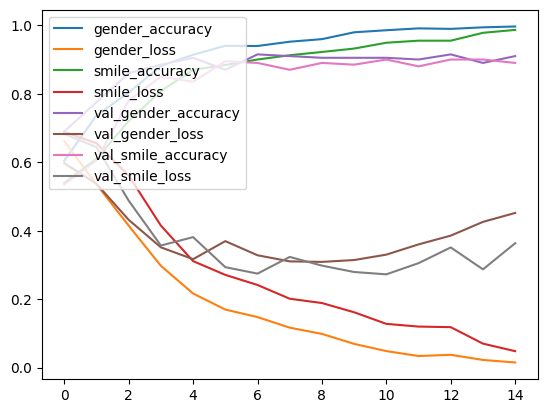

In [29]:
plt.plot(hist2.history['dense_4_accuracy'], label = 'gender_accuracy')
plt.plot(hist2.history['dense_4_loss'], label = 'gender_loss')

plt.plot(hist2.history['dense_5_accuracy'], label = 'smile_accuracy')
plt.plot(hist2.history['dense_5_loss'], label = 'smile_loss')

plt.plot(hist2.history['val_dense_4_accuracy'], label = 'val_gender_accuracy')
plt.plot(hist2.history['val_dense_4_loss'], label = 'val_gender_loss')

plt.plot(hist2.history['val_dense_5_accuracy'], label = 'val_smile_accuracy')
plt.plot(hist2.history['val_dense_5_loss'], label = 'val_smile_loss')

plt.legend(loc ='upper left')
plt.show()

In [27]:
hist2.history

{'loss': [1.349579930305481,
  1.1910030841827393,
  0.9756280183792114,
  0.712311327457428,
  0.527613639831543,
  0.44061899185180664,
  0.38913318514823914,
  0.31802794337272644,
  0.28721383213996887,
  0.23108775913715363,
  0.1761840581893921,
  0.15381582081317902,
  0.155702143907547,
  0.09254562854766846,
  0.06314656138420105],
 'dense_4_loss': [0.6611643433570862,
  0.5355278253555298,
  0.41468581557273865,
  0.29738473892211914,
  0.21649612486362457,
  0.16968344151973724,
  0.14768806099891663,
  0.11675439774990082,
  0.09851377457380295,
  0.06935437768697739,
  0.0483514741063118,
  0.03389737010002136,
  0.037479620426893234,
  0.022462163120508194,
  0.015062854625284672],
 'dense_5_loss': [0.6884154081344604,
  0.6554754376411438,
  0.5609421730041504,
  0.41492655873298645,
  0.3111175000667572,
  0.270935595035553,
  0.24144519865512848,
  0.2012735903263092,
  0.18870005011558533,
  0.16173329949378967,
  0.12783262133598328,
  0.11991844326257706,
  0.118222

## 7. 결과확인

In [45]:
res =model2.predict(test_images[0:1])
print(res[0][0], res[1][0])
print(len(res))
print(res[0].shape, res[1].shape)

1/1 [==============================] - 0s 18ms/step
[4.1441742e-04 9.9958557e-01] [1.0513933e-06 9.9999893e-01]
2
(1, 2) (1, 2)


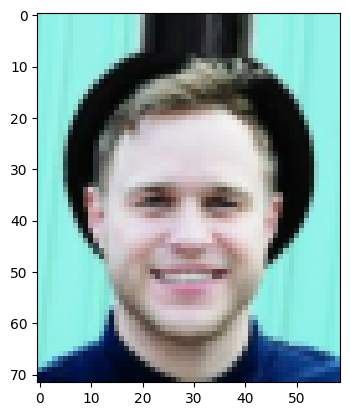

In [46]:
plt.imshow(test_images[0])
plt.show()

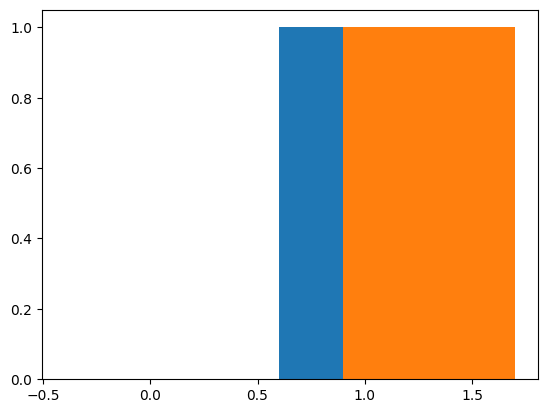

[4.1441742e-04 9.9958557e-01]


In [47]:
plt.bar(np.arange(2), res[0][0])
plt.bar(np.arange(2)+0.3, test_male_labels[0])
plt.show()
print(res[0][0])

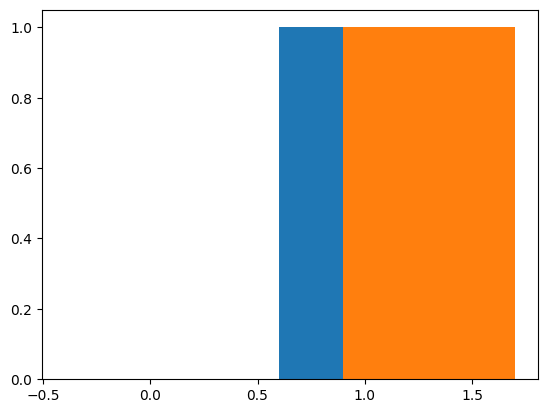

[1.0513933e-06 9.9999893e-01]


In [48]:
plt.bar(np.arange(2), res[1][0])
plt.bar(np.arange(2)+0.3, test_smile_labels[0])
plt.show()
print(res[1][0])

In [49]:
res = model2.predict(test_images[1:2])
print(res[0][0], res[1][0])
print(len(res))
print(res[0].shape, res[1].shape)

1/1 [==============================] - 0s 17ms/step
[9.999920e-01 7.965361e-06] [0.93068933 0.06931068]
2
(1, 2) (1, 2)


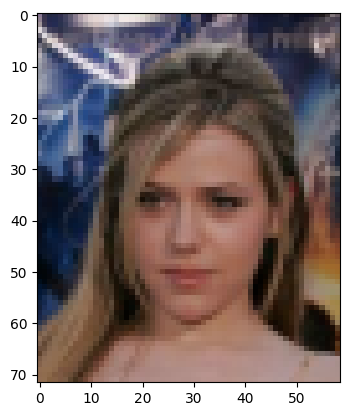

In [50]:
plt.imshow(test_images[1])
plt.show()

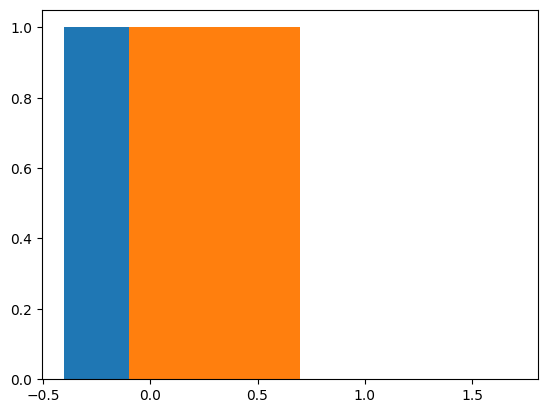

[9.999920e-01 7.965361e-06]


In [51]:
plt.bar(np.arange(2), res[0][0])
plt.bar(np.arange(2)+0.3, test_male_labels[1])
plt.show()
print(res[0][0])

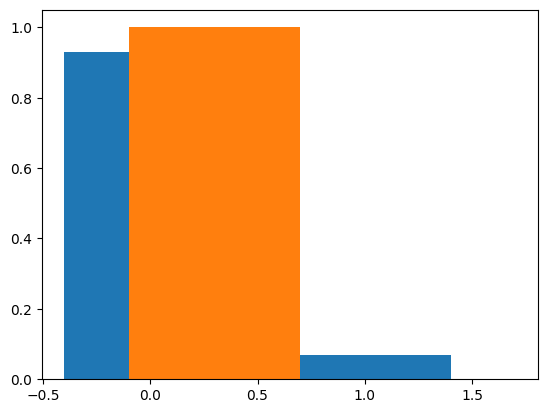

[9.999920e-01 7.965361e-06]


In [52]:
plt.bar(np.arange(2), res[1][0])
plt.bar(np.arange(2)+0.3, test_smile_labels[1])
plt.show()
print(res[0][0])

## 8.모델분리

In [53]:
# 성별모델 분리

model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 72, 59, 3)]          0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 70, 57, 32)           896       ['input_2[0][0]']             
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 35, 28, 32)           0         ['conv2d_3[0][0]']            
 g2D)                                                                                             
                                                                                                  
 conv2d_4 (Conv2D)           (None, 33, 26, 64)           18496     ['max_pooling2d_3[0][0]'

In [54]:
gender_model2 = Model(inputs = model2.input, outputs = model2.get_layer('dense_4').output)
gender_model2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 72, 59, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 70, 57, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 35, 28, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 33, 26, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 11, 64)        3692

In [55]:
# smile 모델 분리
smile_model2 = Model(inputs = model2.input, outputs = model2.get_layer('dense_5').output)
smile_model2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 72, 59, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 70, 57, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 35, 28, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 33, 26, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 11, 64)        3692

In [56]:
gender_model2.get_weights()[0][0][0][0]

array([ 0.16832927, -0.13388582,  0.16900843,  0.1893335 ,  0.19603463,
       -0.02505199,  0.11275119,  0.16087437, -0.04341914, -0.15800928,
        0.11627558, -0.12604696,  0.06334035, -0.02964263, -0.14006759,
       -0.10630933, -0.06713369,  0.10025921,  0.03030363,  0.14790627,
       -0.11458742, -0.1516469 ,  0.09517787,  0.18809317,  0.1715288 ,
        0.11631674, -0.16500185, -0.03659299, -0.07536345, -0.14769466,
        0.15963688, -0.17851955], dtype=float32)

In [57]:
smile_model2.get_weights()[0][0][0][0]


array([ 0.16832927, -0.13388582,  0.16900843,  0.1893335 ,  0.19603463,
       -0.02505199,  0.11275119,  0.16087437, -0.04341914, -0.15800928,
        0.11627558, -0.12604696,  0.06334035, -0.02964263, -0.14006759,
       -0.10630933, -0.06713369,  0.10025921,  0.03030363,  0.14790627,
       -0.11458742, -0.1516469 ,  0.09517787,  0.18809317,  0.1715288 ,
        0.11631674, -0.16500185, -0.03659299, -0.07536345, -0.14769466,
        0.15963688, -0.17851955], dtype=float32)

In [59]:
x = gender_model2.predict(test_images[0:1])
x.argmax()

1/1 [==============================] - 0s 26ms/step


1

In [60]:
x = smile_model2.predict(test_images[0:1])
x.argmax()

1/1 [==============================] - 0s 110ms/step


1

## 9.통합 모델 저장 및 로드, 다운

In [61]:
model2.save('/content/drive/MyDrive/딥러닝_정주행/P7_Ch02.인물사진성별표정분석/lecture004.h5')

In [62]:
model3 =tf.keras.models.load_model('/content/drive/MyDrive/딥러닝_정주행/P7_Ch02.인물사진성별표정분석/lecture004.h5')

In [63]:
model3.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 72, 59, 3)]          0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 70, 57, 32)           896       ['input_2[0][0]']             
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 35, 28, 32)           0         ['conv2d_3[0][0]']            
 g2D)                                                                                             
                                                                                                  
 conv2d_4 (Conv2D)           (None, 33, 26, 64)           18496     ['max_pooling2d_3[0][0]'

In [64]:
model3.get_weights()[0][0][0][0]

array([ 0.16832927, -0.13388582,  0.16900843,  0.1893335 ,  0.19603463,
       -0.02505199,  0.11275119,  0.16087437, -0.04341914, -0.15800928,
        0.11627558, -0.12604696,  0.06334035, -0.02964263, -0.14006759,
       -0.10630933, -0.06713369,  0.10025921,  0.03030363,  0.14790627,
       -0.11458742, -0.1516469 ,  0.09517787,  0.18809317,  0.1715288 ,
        0.11631674, -0.16500185, -0.03659299, -0.07536345, -0.14769466,
        0.15963688, -0.17851955], dtype=float32)

In [65]:
model3.evaluate(test_images, [test_male_labels, test_smile_labels])

7/7 [==============================] - 0s 7ms/step - loss: 0.8153 - dense_4_loss: 0.4518 - dense_5_loss: 0.3634 - dense_4_accuracy: 0.9100 - dense_5_accuracy: 0.8900


[0.8152545094490051,
 0.451833575963974,
 0.36342093348503113,
 0.9100000262260437,
 0.8899999856948853]

In [66]:
from google.colab import files
files.download('/content/drive/MyDrive/딥러닝_정주행/P7_Ch02.인물사진성별표정분석/lecture004.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>